# Energy consumption

## Import data from .xlsx spreadsheet

In [1]:
# https://www.datacamp.com/community/tutorials/python-excel-tutorial

import pandas as pd

file = 'energy_consumption.xlsx'

xl = pd.ExcelFile(file)

df = xl.parse('Tabelle1')

#Alternative way to load a sheet into a dataframe
#df = pd.read_excel(xl, 'Tabelle1')

## Data inspection

In [2]:
#Pandas introduction: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
#Pandas cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

df.set_index('date', inplace=True)
print(df)

              a      b      c      d      e      f      g      h      i     j
date                                                                         
20180901  44107  41201  14946  24385  15849  17370  16918  24301  40200  8506
20181001  44395  41494  15074  24526  15966  17531  17052  24482  40713  8580
20181101  44715  41814  15196  24691  16106  17702  17197  24691  41361  8661
20181201  45058  42136  15350  24837  16244  17878  17346  24906  42000  8743
20190101  45414  42473  15512  24990  16396  18027  17509  25152  42644  8828
20190201  45818  42809  15662  25172  16556  18203  17644  25381  43333  8910
20190301  46160  43114  15808  25342  16686  18365  17779  25583  43896  8984


In [3]:
df_diff = df.diff()
df_diff = df_diff.iloc[1:]
print(df_diff)

              a      b      c      d      e      f      g      h      i     j
date                                                                         
20181001  288.0  293.0  128.0  141.0  117.0  161.0  134.0  181.0  513.0  74.0
20181101  320.0  320.0  122.0  165.0  140.0  171.0  145.0  209.0  648.0  81.0
20181201  343.0  322.0  154.0  146.0  138.0  176.0  149.0  215.0  639.0  82.0
20190101  356.0  337.0  162.0  153.0  152.0  149.0  163.0  246.0  644.0  85.0
20190201  404.0  336.0  150.0  182.0  160.0  176.0  135.0  229.0  689.0  82.0
20190301  342.0  305.0  146.0  170.0  130.0  162.0  135.0  202.0  563.0  74.0


In [4]:
df_diff.describe()

,a,b,c,d,e,f,g,h,i,j
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,342.166667,318.833333,143.666667,159.500000,139.500000,165.833333,143.500000,213.666667,616.000000,79.666667
std,38.576763,17.290653,15.513435,15.578832,15.332971,10.534072,11.379807,22.393451,64.936892,4.589844
min,288.000000,293.000000,122.000000,141.000000,117.000000,149.000000,134.000000,181.000000,513.000000,74.000000
25%,325.500000,308.750000,132.500000,147.750000,132.000000,161.250000,135.000000,203.750000,582.000000,75.750000
50%,342.500000,321.000000,148.000000,159.000000,139.000000,166.500000,140.000000,212.000000,641.500000,81.500000
75%,352.750000,332.500000,153.000000,168.750000,149.000000,174.750000,148.000000,225.500000,647.000000,82.000000
max,404.000000,337.000000,162.000000,182.000000,160.000000,176.000000,163.000000,246.000000,689.000000,85.000000


## Visualization

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
#style.use('ggplot')

In [18]:
x = range(len(df_diff))

In [7]:
df_diff.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

### Monthly energy consumption per party

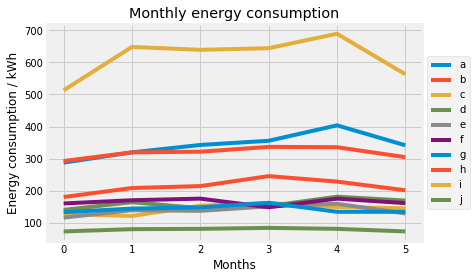

In [19]:
for i in range(len(df_diff.columns)):
    plt.plot(x, df_diff.iloc[:,i])
    
plt.title("Monthly energy consumption")
plt.legend(df_diff.columns, loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlabel("Months")
plt.ylabel("Energy consumption / kWh")
plt.show()

### Monthly energy consumption per party (normalized)

In [9]:
import calendar

In [10]:
df_diff_norm = df_diff.copy()

In [11]:
days_list = [calendar.monthrange(int(str(element)[0:4]),int(str(element)[4:6]))[1] for element in df_diff_norm.index.tolist()]
days_df = pd.DataFrame(days_list)

In [12]:
for index, days in enumerate(days_list):
    df_diff_norm.iloc[index] = df_diff_norm.iloc[index] / days * 365 / 12
print(df_diff_norm)

                   a           b           c           d           e  \
date                                                                   
20181001  282.580645  287.486559  125.591398  138.346774  114.798387   
20181101  324.444444  324.444444  123.694444  167.291667  141.944444   
20181201  336.545699  315.940860  151.102151  143.252688  135.403226   
20190101  349.301075  330.658602  158.951613  150.120968  149.139785   
20190201  438.869048  365.000000  162.946429  197.708333  173.809524   
20190301  335.564516  299.260753  143.252688  166.801075  127.553763   

                   f           g           h           i          j  
date                                                                 
20181001  157.970430  131.478495  177.594086  503.346774  72.607527  
20181101  173.375000  147.013889  211.902778  657.000000  82.125000  
20181201  172.688172  146.196237  210.954301  626.975806  80.456989  
20190101  146.196237  159.932796  241.370968  631.881720  83.400538  
201

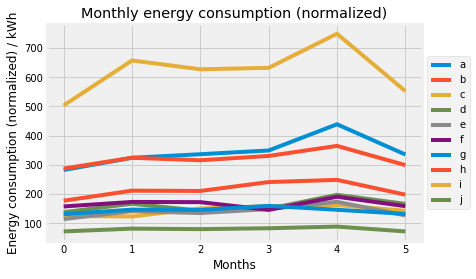

In [20]:
for i in range(len(df_diff_norm.columns)):
    plt.plot(x, df_diff_norm.iloc[:,i])
    
plt.title("Monthly energy consumption (normalized)")
plt.legend(df_diff_norm.columns, loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlabel("Months")
plt.ylabel("Energy consumption (normalized) / kWh")
plt.show()

### Total energy consumption per party

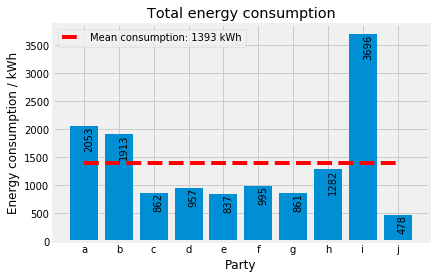

In [21]:
plt.bar(df_diff.columns, df_diff.sum())
plt.xticks(df_diff.columns)
plt.title("Total energy consumption")
plt.xlabel("Party")
plt.ylabel("Energy consumption / kWh")
label = "Mean consumption: " + str(int(df_diff.sum().mean())) + " kWh" 
plt.hlines(df_diff.sum().mean(), df_diff.columns[0], df_diff.columns[-1], color = "r", linestyles = "dashed", \
           label = label
          )
plt.legend()
for a,b in zip(df_diff.columns, df_diff.sum()):
    plt.text(a, b - 140, str(round(b)), rotation = "vertical")
plt.show()

### single bar chart:

### 3D bar chart:

## Monthly energy consumption per person

## Yearly energy consumption per party and total

## Summer vs winter months

## Month with highest/lowest consumption